In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
def generate_coin_model(beta_parameter, number_coin_throws):
    model = pm.Model()
    with model:
        theta = pm.Beta('theta', beta_parameter, beta_parameter)
        coin = pm.Binomial('coin', p=theta, n=number_coin_throws, observed=number_coin_throws)
        coin_unobserved = pm.Binomial('coin_unobserved', p=theta, n=1)
        trace = pm.sample()
    return model, trace

def plot_trace(trace):
    _ = pm.traceplot(trace)
    plt.show()
    
def summary_and_MAP(model, trace):
    pm.summary(trace)
    map_estimate = pm.find_MAP(model=model)
    print("MAP estimate: {}".format(map_estimate['theta']))
    
def plot_predictive(model, trace, numer_coin_throws):
    ppc = pm.sample_ppc(trace, model=model, samples=500)
    
    ax = plt.subplot()
    sns.distplot(ppc['coin']/numer_coin_throws, kde=False, ax=ax)
    ax.set(title='Posterior predictive');
    plt.show()

def all_analysis(model, trace, numer_coin_throws):
    plot_trace(trace)
    summary_and_MAP(model, trace)
    #plot_predictive(model, trace, numer_coin_throws)

Assigned NUTS to theta_logodds__
Assigned Metropolis to coin_unobserved
100%|██████████| 1000/1000 [00:00<00:00, 1113.37it/s]


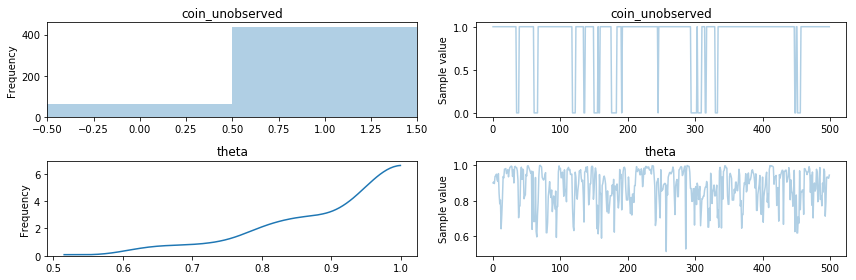


coin_unobserved:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.874            0.332            0.027            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          1.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.879            0.102            0.006            [0.661, 0.999]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.628          0.819          0.905          0.964          0.995



logp = -4.852, ||grad|| = 2.5: 100%|██████████| 8/8 [00:00<00:00, 1927.20it/s]

MAP estimate: 0.857142841107735


In [14]:
model, trace = generate_coin_model(beta_parameter=1, number_coin_throws=6)
all_analysis(model, trace, numer_coin_throws=6)

Assigned NUTS to theta_logodds__
Assigned Metropolis to coin_unobserved
100%|██████████| 1000/1000 [00:00<00:00, 1147.25it/s]


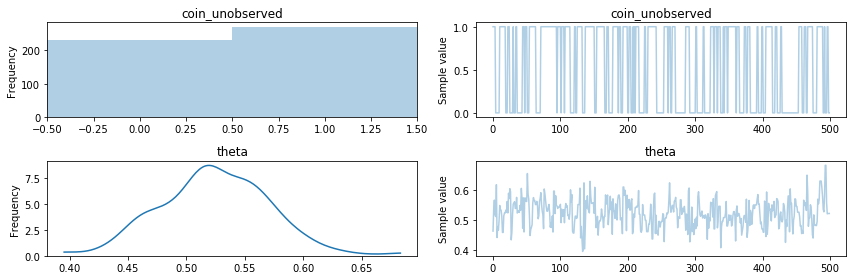


coin_unobserved:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.540            0.498            0.036            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.525            0.046            0.003            [0.440, 0.611]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.437          0.496          0.523          0.555          0.611



logp = -2.6862, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 1791.42it/s]

MAP estimate: 0.5199999999781558


In [15]:
model, trace = generate_coin_model(beta_parameter=60, number_coin_throws=6)
all_analysis(model, trace, numer_coin_throws=6)

Assigned NUTS to theta_logodds__
Assigned Metropolis to coin_unobserved
 97%|█████████▋| 971/1000 [00:00<00:00, 1070.67it/s]/media/libre/venv/lib/python3.4/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.884229476958, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 1000/1000 [00:00<00:00, 1067.83it/s]


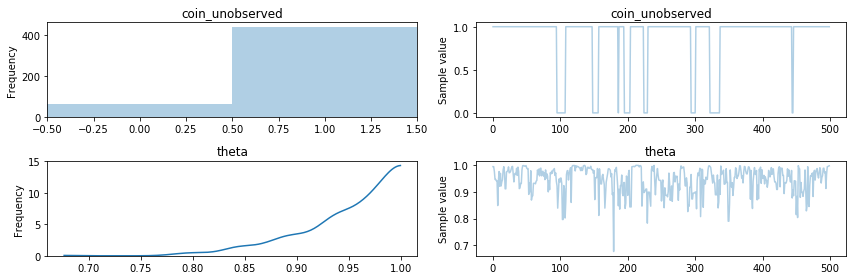


coin_unobserved:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.876            0.330            0.029            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          1.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.944            0.049            0.003            [0.844, 0.999]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.829          0.922          0.959          0.983          0.998



logp = -14.556, ||grad|| = 9.5: 100%|██████████| 10/10 [00:00<00:00, 2759.59it/s]

MAP estimate: 0.9523809484178871


In [16]:
model, trace = generate_coin_model(beta_parameter=1, number_coin_throws=20)
all_analysis(model, trace, numer_coin_throws=20)

Assigned NUTS to theta_logodds__
Assigned Metropolis to coin_unobserved
100%|██████████| 1000/1000 [00:00<00:00, 1089.72it/s]


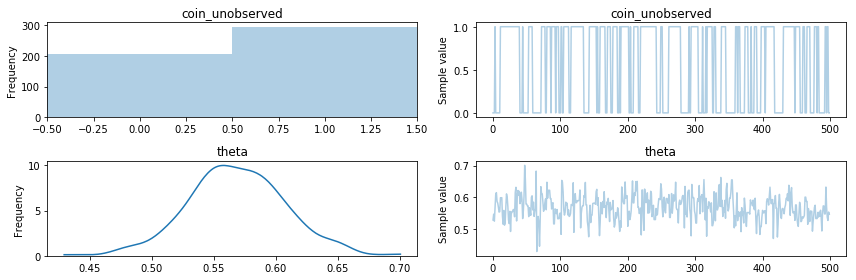


coin_unobserved:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.590            0.492            0.037            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.568            0.039            0.003            [0.503, 0.655]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.490          0.544          0.568          0.595          0.648



logp = -12.39, ||grad|| = 9.5: 100%|██████████| 6/6 [00:00<00:00, 2093.66it/s]

MAP estimate: 0.5683453219943871


In [17]:
model, trace = generate_coin_model(beta_parameter=60, number_coin_throws=20)
all_analysis(model, trace, numer_coin_throws=20)

Assigned NUTS to theta_logodds__
Assigned Metropolis to coin_unobserved
100%|██████████| 1000/1000 [00:00<00:00, 1125.74it/s]


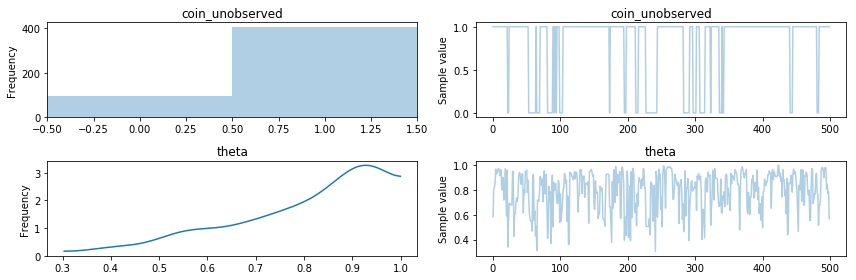


coin_unobserved:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.812            0.391            0.032            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          1.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.791            0.159            0.011            [0.477, 0.999]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.413          0.690          0.840          0.921          0.981



logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 2043.18it/s]

MAP estimate: 0.7499996941800062


In [18]:
model, trace = generate_coin_model(beta_parameter=1, number_coin_throws=3)
all_analysis(model, trace, numer_coin_throws=3)

Assigned NUTS to theta_logodds__
Assigned Metropolis to coin_unobserved
100%|██████████| 1000/1000 [00:00<00:00, 1147.48it/s]


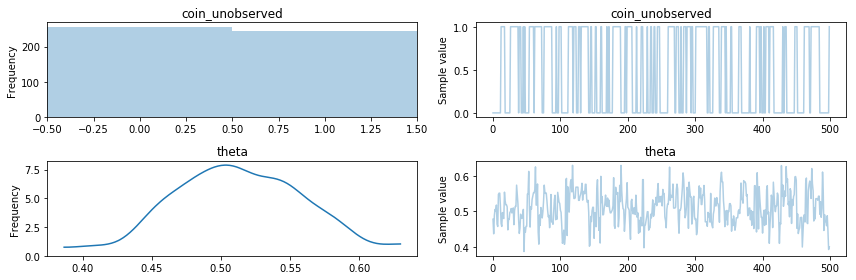


coin_unobserved:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.488            0.500            0.035            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.512            0.047            0.003            [0.432, 0.613]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.410          0.480          0.510          0.546          0.599



logp = -0.60671, ||grad|| = 1: 100%|██████████| 5/5 [00:00<00:00, 1839.45it/s]

MAP estimate: 0.5081966779965544


In [19]:
model, trace = generate_coin_model(beta_parameter=60, number_coin_throws=3)
all_analysis(model, trace, numer_coin_throws=3)